## 당뇨병환자 데이터 로드

In [212]:
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes()

In [213]:
df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

print(type(df_X))
print(type(df_y))

(442, 10)
(442,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


데이터 분리

In [214]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


기울기와 절편설정

In [216]:
W = np.random.rand(10)
b = np.random.rand(1)

print(W, b)

[0.2206803  0.44297285 0.2108665  0.54242731 0.9565613  0.28907347
 0.91293016 0.91054408 0.62369651 0.18334026] [0.89401209]


모델 정의

In [217]:
def model(X,w,b):
  predictions = 0
  for i in range(10):
    predictions += X[:,i] * w[i]
  predictions += b
  return predictions

손실함수, loss, gradient 정의

In [218]:
def MSE(a,b):
  mse = ((a-b) ** 2).mean()
  return mse

def loss(X,W,b,y):
  predictions = model(X,W,b)
  Loss = MSE(predictions,y)
  return Loss

def gradient(X,W,b,y):
  N = len(y)

  y_pred = model(X,W,b)

  dW = 1/N * 2 * X.T.dot(y_pred - y)

  db = 2 * (y_pred - y).mean()

  return dW, db


gradient를 통해 최적의 해 출력

In [219]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [-1.85307598 -0.10575797 -4.97582291 -3.70994536 -1.30374268 -0.89308103
  3.11301403 -3.26956753 -4.47441466 -3.51157682]
db: -305.6826914189957


하이퍼 파라미터 설정 모델학습

In [220]:
l_r = 0.1

losses = []

for i in range(5000):
  dW, db = gradient(X_train, W, b, y_train)
  W = W - l_r * dW
  b = b - l_r * db
  Loss = loss(X_train, W, b, y_train)
  losses.append(Loss)
  if i % 100 == 0:
    print("Loss:", Loss)

Loss: 21009.33210270574
Loss: 5374.60836162053
Loss: 4873.622844558953
Loss: 4501.0414571411
Loss: 4220.265083596804
Loss: 4005.545418186354
Loss: 3838.72344438633
Loss: 3706.952945363982
Loss: 3601.1110505843167
Loss: 3514.6880282212283
Loss: 3443.011426359632
Loss: 3382.7035176189124
Loss: 3331.3015774807277
Loss: 3286.991846072655
Loss: 3248.422889042114
Loss: 3214.5744394235253
Loss: 3184.665031370414
Loss: 3158.0867781080965
Loss: 3134.359162684257
Loss: 3113.0961627676547
Loss: 3093.9827417883516
Loss: 3076.757932579832
Loss: 3061.202572874515
Loss: 3047.13033364166
Loss: 3034.381087430171
Loss: 3022.8159476466253
Loss: 3012.3135080610036
Loss: 3002.7669505926256
Loss: 2994.0817865831436
Loss: 2986.174064864975
Loss: 2978.9689277390135
Loss: 2972.399429594764
Loss: 2966.4055566027414
Loss: 2960.9334026593915
Loss: 2955.934468647106
Loss: 2951.3650605377134
Loss: 2947.1857679318837
Loss: 2943.3610089986996
Loss: 2939.8586309559623
Loss: 2936.6495575606045
Loss: 2933.7074768041616


모델 학습

In [221]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2866.840653864616)

학습결과 시각화

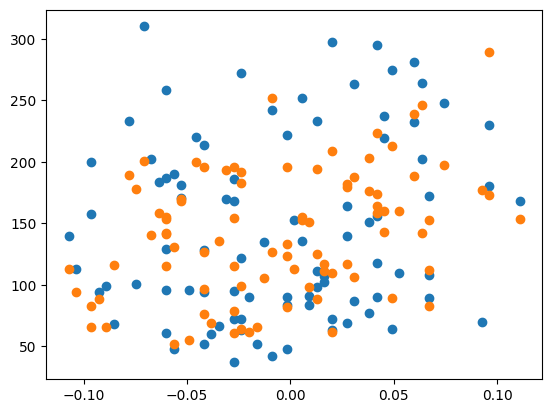

In [222]:
import matplotlib.pyplot as plt


plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()